# Week2_Assingment

In [ ]:
## Logistic Regression 으로 모델링하기

# 1. 데이터, 라이브러리 불러오기


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/windows/Desktop/python/Dataset/diabetes.csv')


# 2. 데이터 전처리

### 2.1. 결측치 확인

In [2]:
df.isnull().sum() #결측치 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2.2. 데이터의 head, tail 살펴보기

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail() # 결측치는 없지만 0값이 많음 -> 데이터 변수별로 자세히 살펴보지지

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### 2.3. 변수별로 데이터 살펴보기-> 이상치 있으면 제거

#### 2.3.1. Pregnancies

<Axes: xlabel='Pregnancies', ylabel='count'>

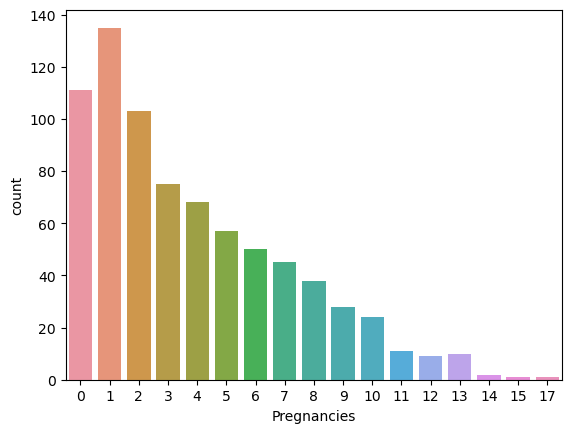

In [ ]:
df['Pregnancies'].value_counts()
sns.countplot(x='Pregnancies', data=df) # 10명 이상 출산하는 것이 흔치 않지만 말이 안되지는 않기 때문에 이상치는 아닌 것으로 판단

#### 2.3.2. Glucose


5

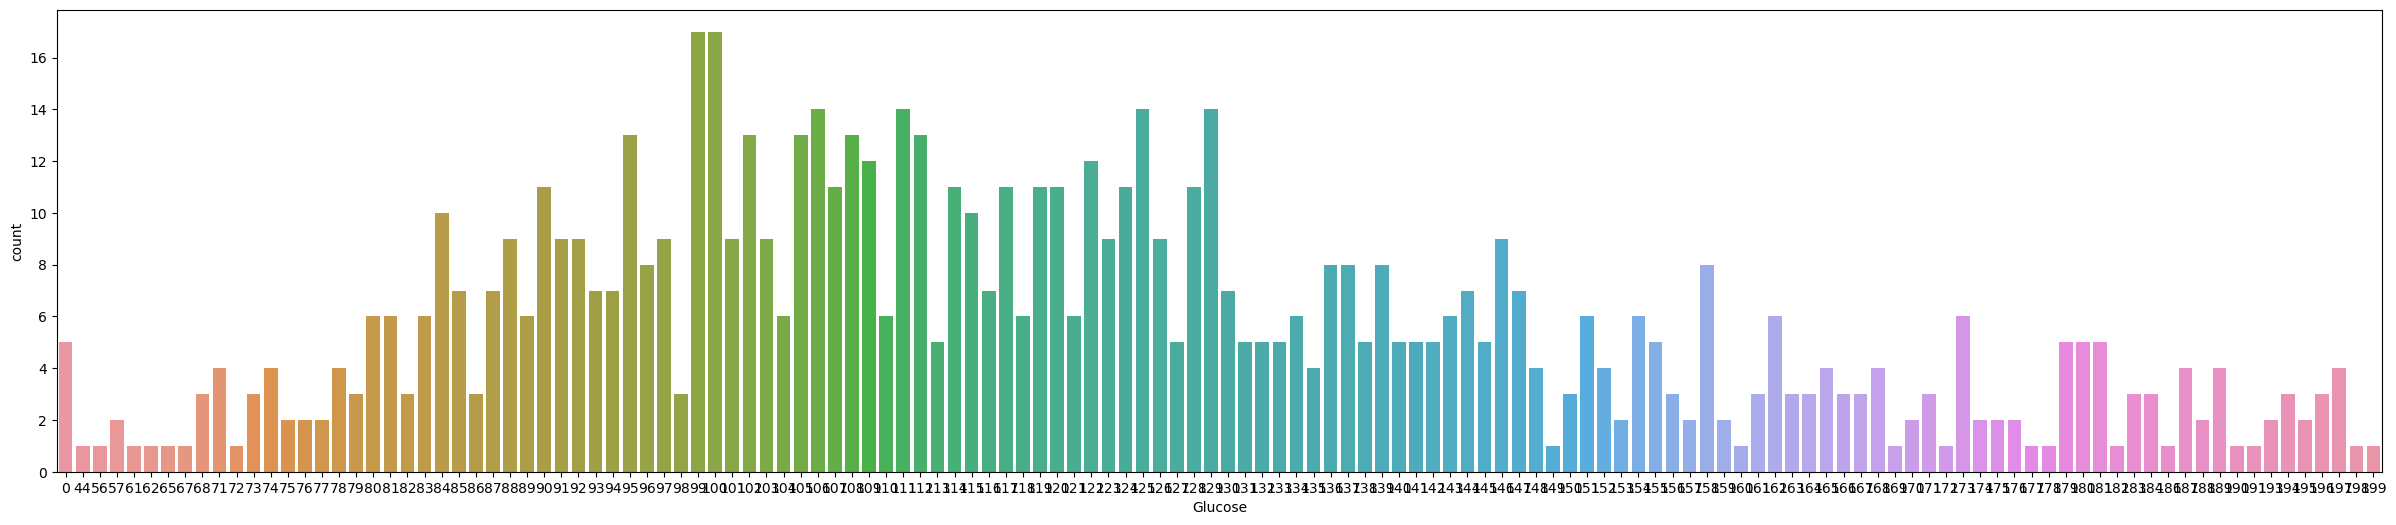

In [20]:
# 크기 설정
plt.figure(figsize=(30, 6))
# countplot 그리기
sns.countplot(x='Glucose', data= df)

df['Glucose'].min() # Glucose가 0인 것은 이상치로 판단할 수 있음
df['Glucose'].max() # Glucose의 최댓값은 199.  어디까지를 당뇨환자로 보고 어디부터를 이상치로 볼지 애매 -> 사분위수로 이상치 제거



In [30]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df1 = df.copy()
df2 = df1[(df1['Glucose'] >= lower_bound) & (df1['Glucose'] <= upper_bound)]
df1.shape #(768, 9)
df2.shape #(763, 9) -> 이상치 5개 제거

(763, 9)

#### 2.3.3. BloodPressure

<Axes: xlabel='BloodPressure', ylabel='count'>

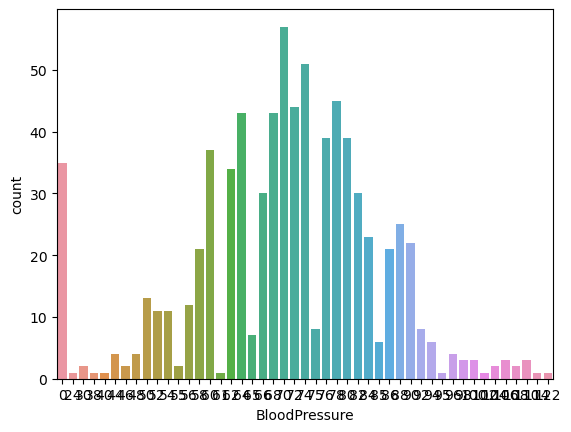

In [31]:
sns.countplot(x='BloodPressure', data=df2)

C:\Users\windows\AppData\Local\Temp\ipykernel_22928\3090669538.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[(df1['BloodPressure'] >= lower_bound) & (df2['BloodPressure'] <= upper_bound)].shape[0] # 718


<Axes: xlabel='BloodPressure', ylabel='count'>

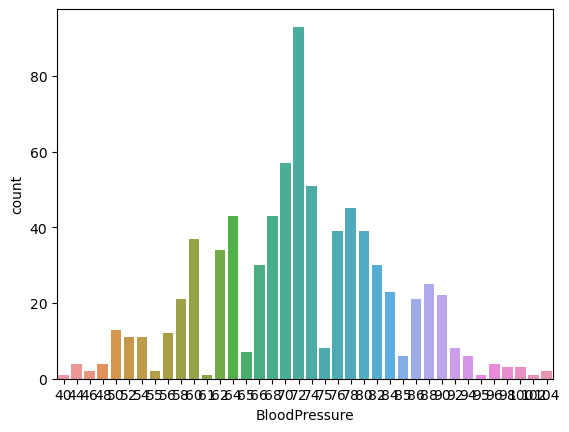

In [ ]:
#이상치 대체하기
Q1 = df2['BloodPressure'].quantile(0.25)
Q3 = df2['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2[(df1['BloodPressure'] >= lower_bound) & (df2['BloodPressure'] <= upper_bound)].shape[0] # 718
# 763-718 = 45개의 이상치 -> 제거하기에 너무 많음 -> 중위수로 대체
BP_median = df2['BloodPressure'].median()
df2.loc[(df2['BloodPressure'] < lower_bound) | (df2['BloodPressure'] > upper_bound), 'BloodPressure'] = BP_median
sns.countplot(x='BloodPressure', data=df2) # 이상치 median으로 대체 완료

#### 2.3.4. SkinThickness


<Axes: xlabel='SkinThickness', ylabel='count'>

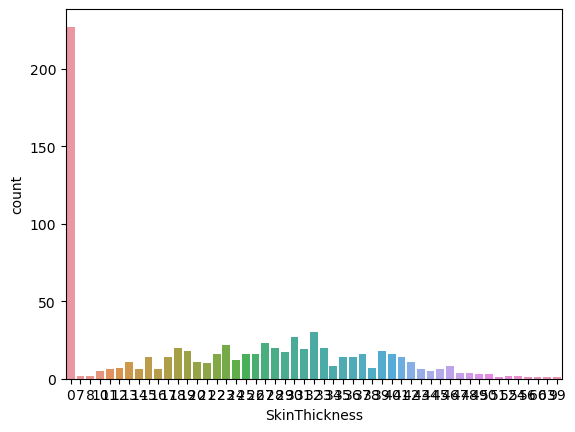

In [38]:
sns.countplot(x='SkinThickness', data=df2) # 0값이 많음 -> 이상치로 판단

<Axes: xlabel='SkinThickness', ylabel='count'>

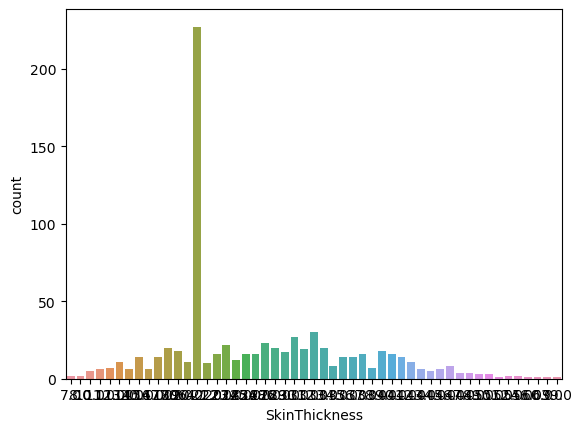

In [ ]:
#이상치를 평균값으로 제거
ST_mean = df2['SkinThickness'].mean()
df2.loc[df2['SkinThickness'] == 0, 'SkinThickness'] = ST_mean
sns.countplot(x='SkinThickness', data=df2) # 이상치 mean으로 대체 완료료

#### 2.3.5. Insulin

<Axes: xlabel='Insulin', ylabel='count'>

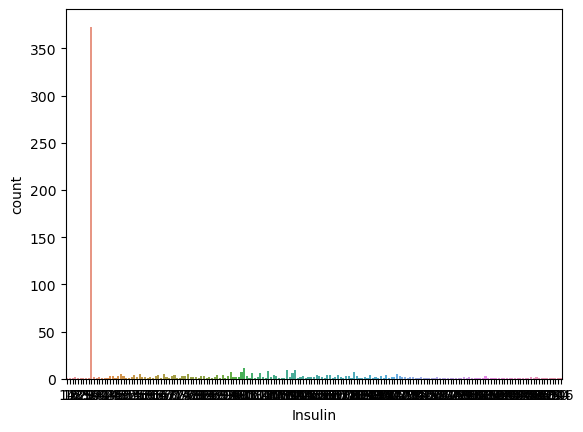

In [49]:
sns.countplot(x='Insulin', data=df2)

In [54]:
df2['Insulin'].describe() #특별히 이상치 제거 안함

count    763.000000
mean      97.749672
std      104.151258
min       14.000000
25%       36.000000
50%       36.000000
75%      128.500000
max      846.000000
Name: Insulin, dtype: float64

#### 2.3.6. BMI


<Axes: xlabel='BMI', ylabel='count'>

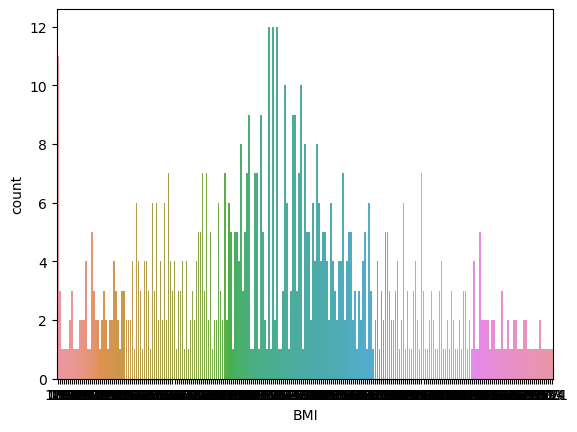

In [55]:
sns.countplot(x='BMI', data= df2)

In [56]:
df2['BMI'].describe()

count    763.000000
mean      31.986763
std        7.893221
min        0.000000
25%       27.300000
50%       32.000000
75%       36.550000
max       67.100000
Name: BMI, dtype: float64

In [59]:
#BMI가 0인 것은 이상치로 판단
df2['BMI'].value_counts() # 0값 11개 -> 이상치로 판단 -> median으로 대체
BMI_median = df2['BMI'].median()
df2.loc[df2['BMI']== 0, 'BMI'] = BMI_median

#### 2.3.7. DiabetesPedigreeFunction

count    763.000000
mean       0.472477
std        0.331963
min        0.078000
25%        0.243500
50%        0.374000
75%        0.626500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

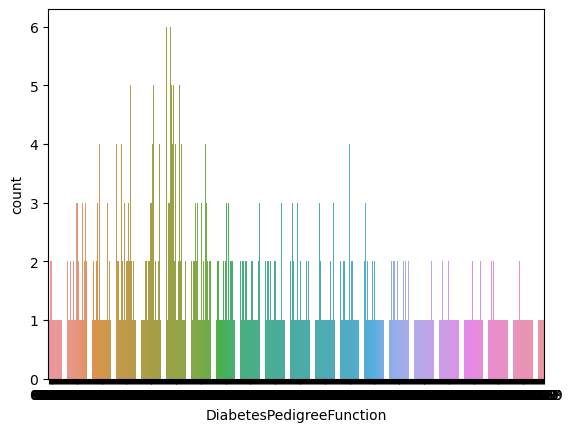

In [ ]:
sns.countplot(x='DiabetesPedigreeFunction', data=df2)
df2['DiabetesPedigreeFunction'].describe() # 이상치 없음


#### 2.3.8. Age

<Axes: xlabel='Age', ylabel='count'>

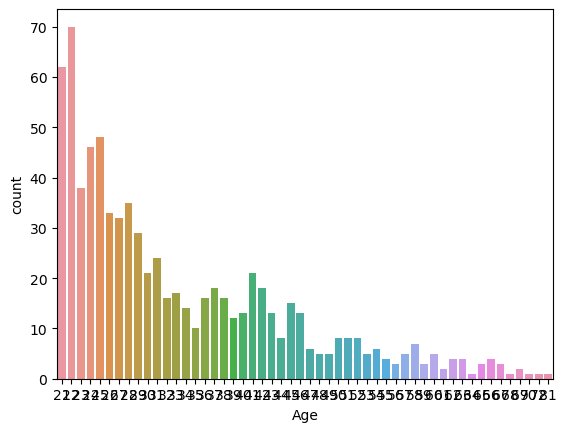

In [62]:
sns.countplot(x='Age', data= df2)

In [63]:
df2['Age'].describe() #이상치 없음

count    763.000000
mean      33.271298
std       11.772161
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

# 3. 목표변수 / 설명변수 설정 


In [69]:
## Y값에는 결측치가 존재해서는 안됨!
X = df2.drop(columns='Outcome') #설명변수
Y = df2['Outcome'] #타겟변수
X.head()
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 4. 학습데이터와 검증데이터를 분할

In [70]:
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [73]:
# X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 분리

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)


# 5. 스케일링(표준화)

In [71]:
# 로지스틱 회귀는 스케일링이 성능에 영향 줄 수 있음
# StandardScaler 사용 (StandardScaler는 이상치에 민감하지만 위의 전처리 과정에서 이상치를 처리했기 때문에 사용 가능)
from sklearn.preprocessing import StandardScaler


In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. 로지스틱 회귀 모델 생성 및 학습


- Logistic Regression 모델
 1. 분류 문제를 해결하기 위한 선형 모델
 2. 종속변수와 독립변수들 간의 인과관계를 로지스틱 함수를 이용하여 추정하는 통계기법
 3. 이항/다항/서수 로지스틱 회귀 중 현재 모델링은 이항 로지스틱 회귀에 해당

In [75]:
from sklearn.linear_model import LogisticRegression
#모델 선언
model = LogisticRegression()
#모델 학습
model.fit(X_train, Y_train)

LogisticRegression()

# 7. 성능 확인


In [76]:
from sklearn.metrics import accuracy_score

In [82]:
# 훈련 데이터 예측값
Y_train_pred = model.predict(X_train) #학습에 사용한 데이터
# 테스트 데이터 예측값
Y_test_pred = model.predict(X_test) #학습에 사용하지 않은 데이터

In [84]:
print('학습 정확도 : ', accuracy_score(Y_train, Y_train_pred)) # 0.79...
print('검증 정확도 : ', accuracy_score(Y_test, Y_test_pred)) # 0.73... 
# 약간의 과적합이 발생함

학습 정확도 :  0.7937062937062938
검증 정확도 :  0.7329842931937173


# 8. 특성공학 사용하여 모델 개선

#### Logistic Regression 모델의 하이퍼 파라미터
- c값: 정규화 강도를 조절, c 값이 작을 수록 강한 정규화 → 모델이 단순해지고 과적합 방지
- penalty: L1, L2 정규화 방법 선택
- solver: 최적화 알고리즘 선택(lbfgs, liblinear, saga ...)
- max_iter: 최적화 알고리즘 최대 반복 횟수

In [91]:
from sklearn.model_selection import GridSearchCV

# 튜닝할 하이퍼파라미터 목록
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],   # 정규화 강도 조절
    'penalty': ['l1', 'l2'],         # 정규화 방식 (L1, L2)
    'solver': ['liblinear', 'saga']  # 최적화 방법 선택 (L1 정규화는 'liblinear' 또는 'saga'만 가능)
}

# GridSearchCV 실행 (5-폴드 교차 검증 적용)
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최적 모델 정확도:", grid_search.best_score_)

# 최적 모델 할당
best_model1= grid_search.best_estimator_


최적 하이퍼파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
최적 모델 정확도: 0.7850343249427917


# 9. best_model1 의 성능 평가

In [88]:
from sklearn.metrics import classification_report 

In [92]:
Y_train_pred = best_model1.predict(X_train) 
Y_test_pred = best_model1.predict(X_test) 
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       379
           1       0.74      0.59      0.66       193

    accuracy                           0.79       572
   macro avg       0.78      0.74      0.75       572
weighted avg       0.79      0.79      0.79       572



In [93]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))



              precision    recall  f1-score   support

           0       0.74      0.86      0.80       118
           1       0.70      0.52      0.60        73

    accuracy                           0.73       191
   macro avg       0.72      0.69      0.70       191
weighted avg       0.73      0.73      0.72       191



- 학습 데이터와 테스트 데이터의 성능이 비슷하게 나옴 -> 과적합 문제 해결
- 클래스 1에 대한 재현율이 0.52로 낮음 -> 클래스 불균형 문제 해결할 필요 있음

# 10. 클래스 불균형 문제 해결하여 모델링하기

- 로지스틱 회귀 모델에서 class_weight='balanced'를 설정하여, 불균형한 클래스에 대해 자동으로 가중치를 조정.

In [95]:
# best_model1에서서 class_weight='balanced' 추가하여 best_model2 생성

best_model2 = LogisticRegression(
    C=0.1,                       
    penalty='l2',                  
    solver='liblinear',            
    class_weight='balanced',       # class_weight='balanced' 추가
    max_iter=200                   
)


In [96]:
# 모델 학습
best_model2.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=200,
                   solver='liblinear')

# 11. best_model2 평가

In [102]:
Y_train_pred = best_model2.predict(X_train) 
Y_test_pred = best_model2.predict(X_test) 
# 학습 성능 평가
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       379
           1       0.64      0.75      0.69       193

    accuracy                           0.77       572
   macro avg       0.75      0.77      0.76       572
weighted avg       0.79      0.77      0.78       572



In [103]:
# 일반화 성능 평가
print(classification_report(Y_test, Y_test_pred))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       118
           1       0.64      0.64      0.64        73

    accuracy                           0.73       191
   macro avg       0.71      0.71      0.71       191
weighted avg       0.73      0.73      0.73       191



- 재현율을 향상시키는 효과가 있었지만, 정밀도와와 F1-Score가 낮아짐
- 잘못된 양성 예측을 최소화하는 것도 중요하지만, 실제 양성(당뇨병 환자)을 놓치지 않는 것이 더 중요하다고 판단 ->재현율이 높은 best_model2 선택

# 12. 모델 저장하기

In [105]:
import pickle

# 모델을 파일로 저장
with open('logistic_model.pkl', 'wb') as file:
       pickle.dump(best_model2, file)